In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#Working with Dataset
customer_data = pd.read_csv('Customers.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customer_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
X = customer_data.drop(columns=['CustomerID','Gender','Age'], axis=1).values

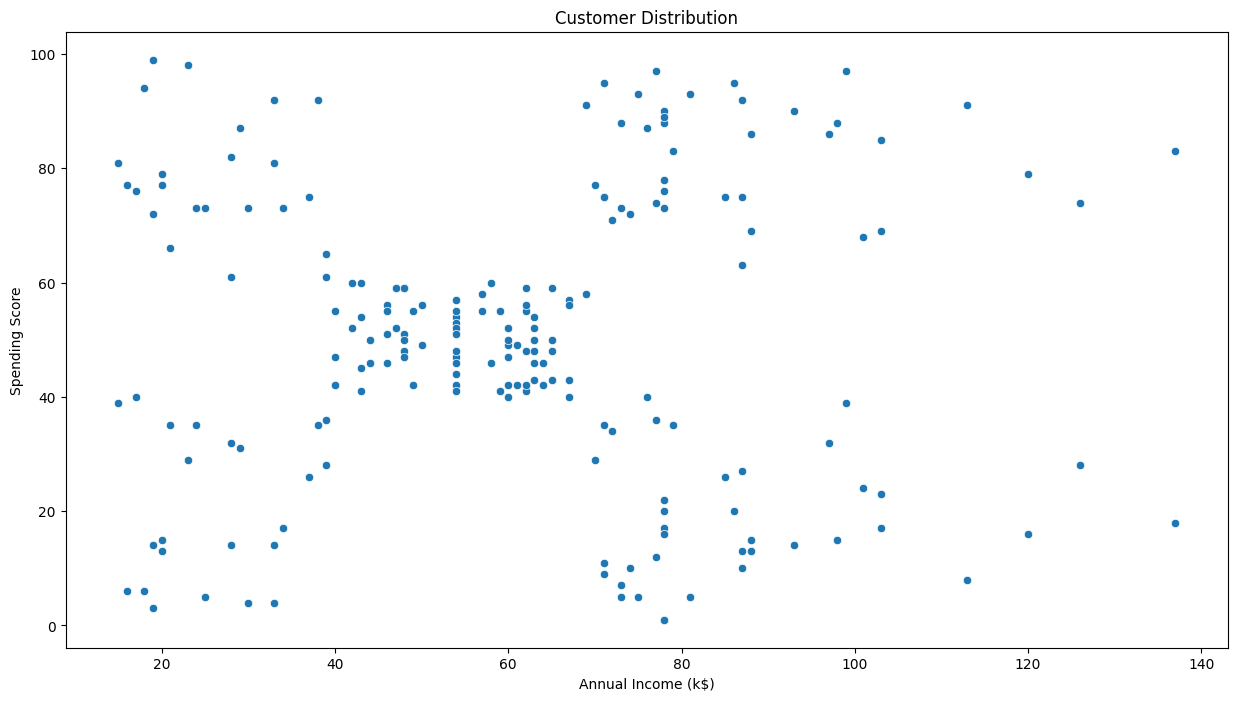

In [7]:
# Visualize the data points
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('Customer Distribution')
plt.show()


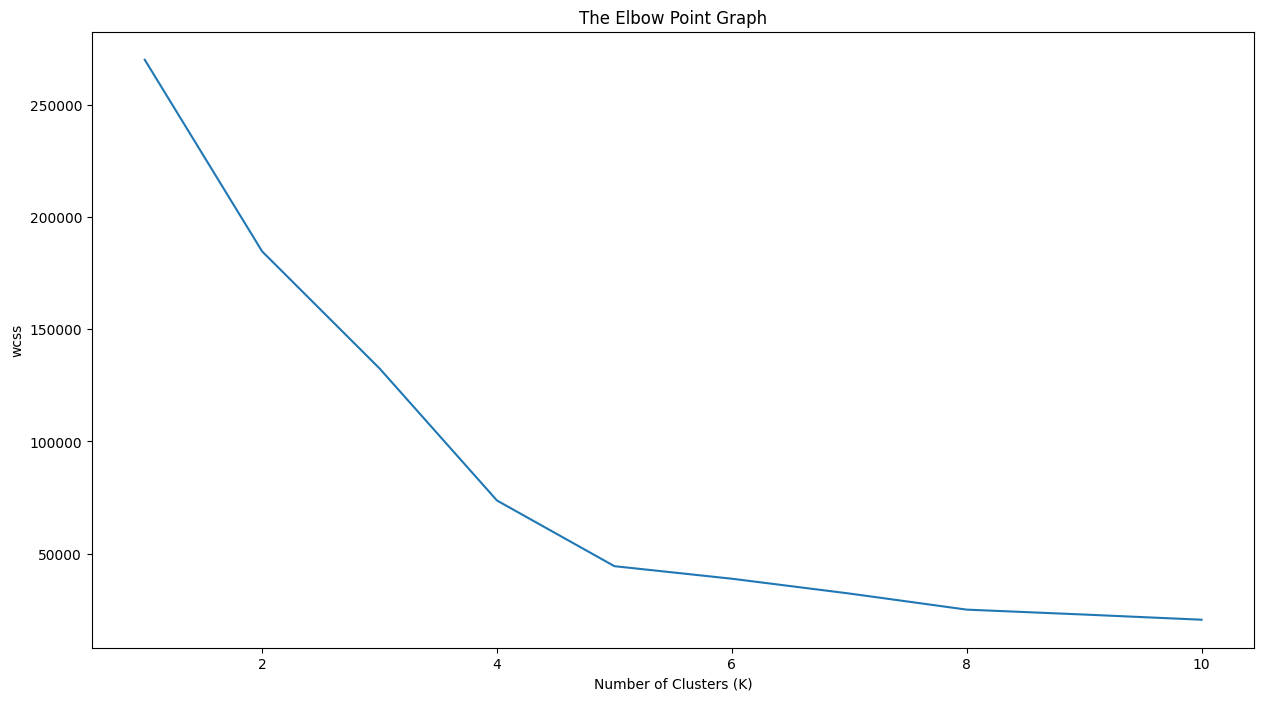

In [8]:
#Find K value using elbow method
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
#Plot a line plot between WCSS and k
plt.figure(figsize=(15,8))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('wcss')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

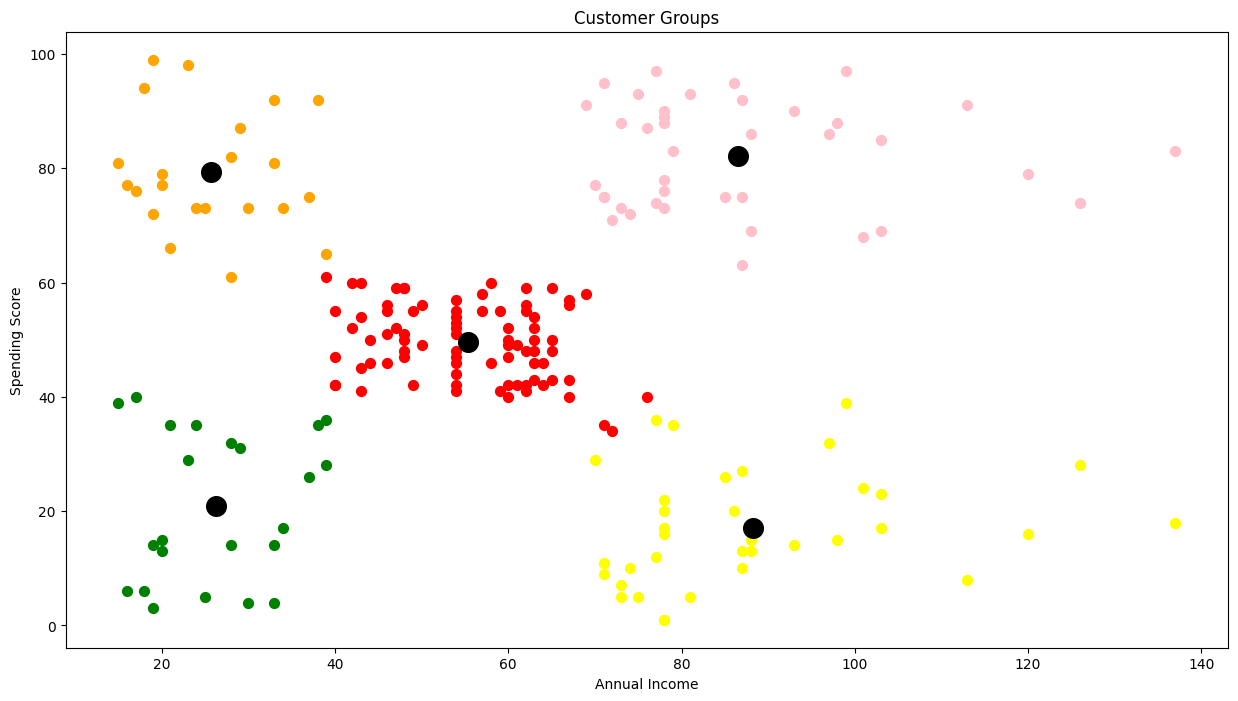

In [10]:
#Centroid points
kmeans.cluster_centers_
#Visualize the clusters formed
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label='Centroids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
